<a href="https://colab.research.google.com/github/AtheerMalki/Module04_ML/blob/main/PCA/pca_instore_or_online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experimenting with PCA

Work through the notebooks in the [Data Science Handbook with Python](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html). Use PCA to reduce the number of features in a dataset.



In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/AtheerMalki/Module04_ML/main/PCA/riyadh_park_pca.csv', nrows=30, index_col='Respondent_ID')
print(df.shape)
df

(30, 5)


,gender,purchase_satisfaction,product_understandability,num_of_childern,instore_or_online
Respondent_ID,,,,,
1,1,2,2,0,0
2,1,2,2,0,0
3,2,3,3,3,1
4,1,5,5,0,0
5,1,7,7,0,0
6,2,5,5,1,1
7,2,7,7,0,1
8,2,4,5,3,1
9,1,6,7,2,0


Key 

Completely disagree	------------ 1


Disagree ------------------------------- 2

Somewhat disagree	------------- 3 

Neither agree nor disagree -- 4 

Somewhat agree ------------------ 5  

Agree	------------------------------------ 6 

Completely agree ----------------- 7

# Prediction / no pca

In [59]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
def pred_and_eval(X_train, X_test, y_train, y_test):
  
  lr = LogisticRegression()
  lr.fit(X_train,y_train)
  prediction = lr.predict(X_test)
  matrix = confusion_matrix(y_test,prediction)

  TP = matrix[0][0]
  FP = matrix[0][1]
  FN = matrix[1][0]
  TN = matrix[1][1]

  print("Accuracy: __ %1.3f" % ((TP+TN)/(TP+FP+FN+TN))) # (true positive + true negative)/ number of guesses
  print("Precision: %1.3f" % (TP/(TP+FP))) # (num true positive)/(num tru positive + num false positive)
  print("Recall: %1.3f" % (TP/(TP+FN))) # (num true positive)/(num tru positive + num false negative)
  print("Confusion matrix:\n", matrix)

  classification_report(y_test,prediction)

In [61]:
X = df[['gender', 'purchase_satisfaction', 'product_understandability', 'num_of_childern']]
y = df['instore_or_online']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.70,test_size=0.30, random_state=42)
pred_and_eval(X_train, X_test, y_train, y_test)

Accuracy: __ 0.667
Precision: 0.800
Recall: 0.667
Confusion matrix:
 [[4 1]
 [2 2]]


# Conducting PCA

In [62]:
# Standardization
df_standarized = StandardScaler().fit_transform(df)
df_standarized.shape
df_standarized

array([[-1.08347268, -2.44196441, -2.39185652, -0.77488969, -0.87447463],
       [-1.08347268, -2.44196441, -2.39185652, -0.77488969, -0.87447463],
       [ 0.72231512, -1.76364096, -1.71491599,  2.25728735,  1.14354375],
       [-1.08347268, -0.40699407, -0.36103495, -0.77488969, -0.87447463],
       [-1.08347268,  0.94965283,  0.9928461 , -0.77488969, -0.87447463],
       [ 0.72231512, -0.40699407, -0.36103495,  0.23583599,  1.14354375],
       [ 0.72231512,  0.94965283,  0.9928461 , -0.77488969,  1.14354375],
       [ 0.72231512, -1.08531752, -0.36103495,  2.25728735,  1.14354375],
       [-1.08347268,  0.27132938,  0.9928461 ,  1.24656167, -0.87447463],
       [ 0.72231512,  0.27132938,  0.9928461 , -0.77488969,  1.14354375],
       [-1.08347268,  0.27132938,  0.9928461 ,  1.24656167, -0.87447463],
       [-1.08347268,  0.94965283,  0.31590558,  0.23583599, -0.87447463],
       [-1.08347268,  0.94965283,  0.31590558, -0.77488969, -0.87447463],
       [ 0.72231512,  0.27132938,  0.3

In [63]:
# check mean and std
np.mean(df_standarized), np.std(df_standarized)

(2.3684757858670008e-17, 1.0)

In [64]:
df_standarized = pd.DataFrame(df_standarized, 
                              columns =["gender", "purchase_satisfaction", "product_understandability", "num_of_children", "instore_or_online"])
df_standarized

,gender,purchase_satisfaction,product_understandability,num_of_children,instore_or_online
0,-1.083473,-2.441964,-2.391857,-0.774890,-0.874475
1,-1.083473,-2.441964,-2.391857,-0.774890,-0.874475
2,0.722315,-1.763641,-1.714916,2.257287,1.143544
3,-1.083473,-0.406994,-0.361035,-0.774890,-0.874475
4,-1.083473,0.949653,0.992846,-0.774890,-0.874475
5,0.722315,-0.406994,-0.361035,0.235836,1.143544
6,0.722315,0.949653,0.992846,-0.774890,1.143544
7,0.722315,-1.085318,-0.361035,2.257287,1.143544
8,-1.083473,0.271329,0.992846,1.246562,-0.874475
9,0.722315,0.271329,0.992846,-0.774890,1.143544


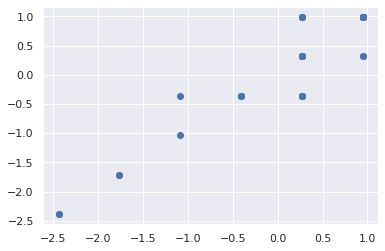

In [65]:
x=df_standarized['purchase_satisfaction']
y=df_standarized['product_understandability']
plt.scatter(x, y)

In [66]:
# PCA
pca = PCA(n_components=2)
principalComponents_df = pca.fit_transform(df_standarized)
principalComponents_df

array([[ 1.65250196,  3.29010697],
       [ 1.65250196,  3.29010697],
       [ 3.23009867,  0.22404949],
       [-0.5744994 ,  1.50318643],
       [-2.05916697,  0.31190607],
       [ 1.24953524, -0.7142539 ],
       [-0.48308026, -1.77904577],
       [ 2.12624315, -0.67902284],
       [-1.18245906,  0.34713712],
       [-0.10226821, -1.49083775],
       [-1.18245906,  0.34713712],
       [-1.44969731,  0.49284974],
       [-1.69764524,  0.61933822],
       [ 0.25925352, -1.18340559],
       [ 1.49155279, -2.41584753],
       [-2.05916697,  0.31190607],
       [-0.21890804,  0.23551344],
       [ 0.62077525, -0.87597344],
       [-0.70736352,  1.08848992],
       [ 0.62077525, -0.87597344],
       [ 2.23981695, -0.2451022 ],
       [-2.05916697,  0.31190607],
       [ 0.25925352, -1.18340559],
       [-1.81121904,  0.18541758],
       [ 0.25925352, -1.18340559],
       [-1.32276356, -0.6675589 ],
       [ 1.64657159,  1.71500182],
       [-0.33248184, -0.1984072 ],
       [ 1.49748317,

In [67]:
df_pcs = pd.DataFrame(data = principalComponents_df,
                      columns = ['pc_1', 'pc_2'])
df_pcs

,pc_1,pc_2
0,1.652502,3.290107
1,1.652502,3.290107
2,3.230099,0.224049
3,-0.574499,1.503186
4,-2.059167,0.311906
5,1.249535,-0.714254
6,-0.483080,-1.779046
7,2.126243,-0.679023
8,-1.182459,0.347137
9,-0.102268,-1.490838


In [68]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.42901413 0.3234744 ]


**pc 4** (*num_of_children*) and **pc 1**: (*gender*) hold 48% and 42% of information about the data, respectively.
**pc 2** (*purchase_satisfaction*) comes 3rd with 32% of info.

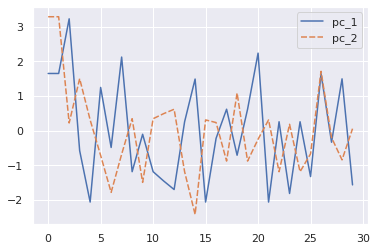

In [69]:
sns.lineplot(data=df_pcs)

<function matplotlib.pyplot.show>

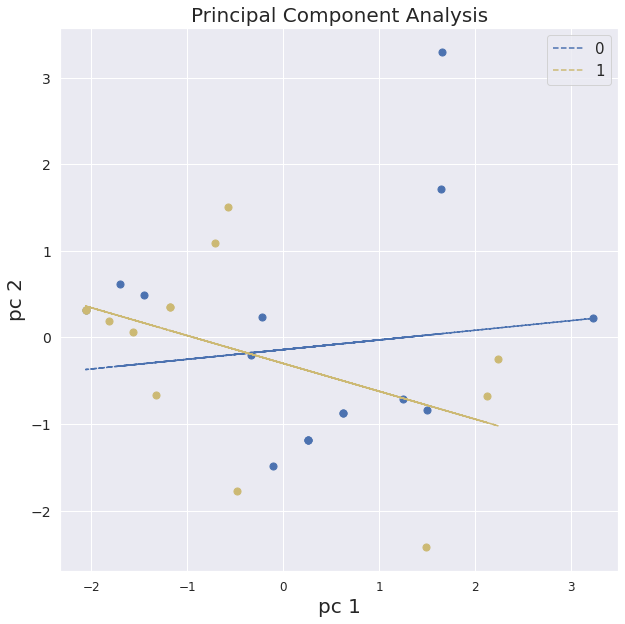

In [70]:
plt.figure(figsize=(10,10), )

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.xlabel('pc 1',fontsize=20)
plt.ylabel('pc 2',fontsize=20)

plt.title("Principal Component Analysis",fontsize=20)

targets = [0, 1] # 0:instore 1:online
colors = ['b', 'y']

for target, color in zip(targets,colors):
    mergedDf = df_pcs.merge(df, left_index=True, right_index=True) 
    indicesToKeep = mergedDf.loc[mergedDf['instore_or_online'] == target]
    
    x = indicesToKeep['pc_1']
    y = indicesToKeep['pc_2']
    
    plt.scatter(x, y, c = color, s = 50)
    
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--", color=color)

plt.legend(targets,prop={'size': 15})
plt.show

# Prediction / with pca

In [73]:
X = df[['gender', 'purchase_satisfaction']]
y = df['instore_or_online']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.70,test_size=0.30, random_state=42)
pred_and_eval(X_train, X_test, y_train, y_test)

Accuracy: __ 0.889
Precision: 0.800
Recall: 1.000
Confusion matrix:
 [[4 1]
 [0 4]]
